edge list and adjacency matrix

n = 6
m = 7
[(1, 2), (1, 5), (2, 3), (2, 4), (3, 5), (3, 4), (3, 6)]
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


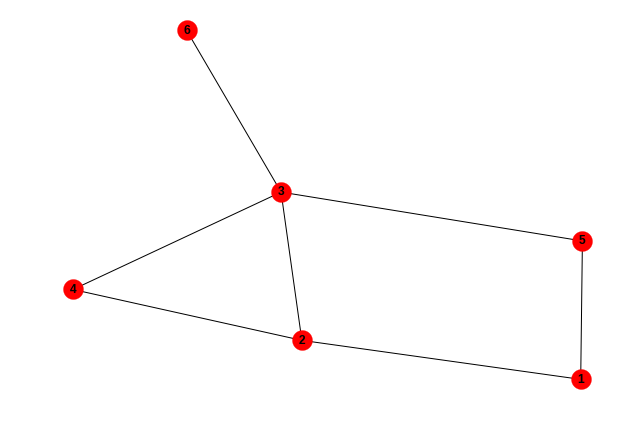

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph() #graph data
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2),(2,3),(1,5),(3,5),(2,4),(3,4),(3,6)])

print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))

nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print(G.edges())
A = nx.adjacency_matrix(G)
print(A.todense())




weighted networks

n = 3
m = 3


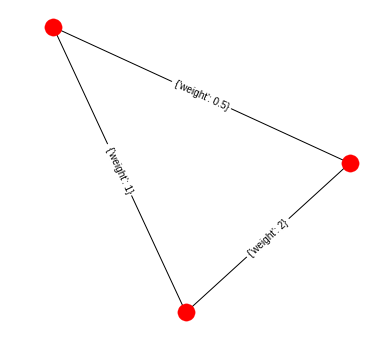

[(1, 2), (1, 3), (2, 3)]
[[0.  2.  1. ]
 [2.  0.  0.5]
 [1.  0.5 0. ]]


In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
G.add_nodes_from(range(1,3))
G.add_edges_from([(1, 2)], weight=2)
G.add_edges_from([(2, 3)], weight=0.5)
G.add_edges_from([(3, 1)], weight=1)

print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))

pos = nx.spring_layout(G)

plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos)
plt.axis('off')
plt.show()

print(G.edges())
A = nx.adjacency_matrix(G)
print(A.todense())




directed networks, cocitation, bibliographic coupling

n = 6
m = 8
[(1, 3), (2, 6), (3, 2), (4, 5), (4, 1), (5, 3), (6, 5), (6, 4)]
[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 1]
 [0 1 0 0 0 0]]
[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]]
yes
[1 1 2 1 2 1]
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]
[[0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]]


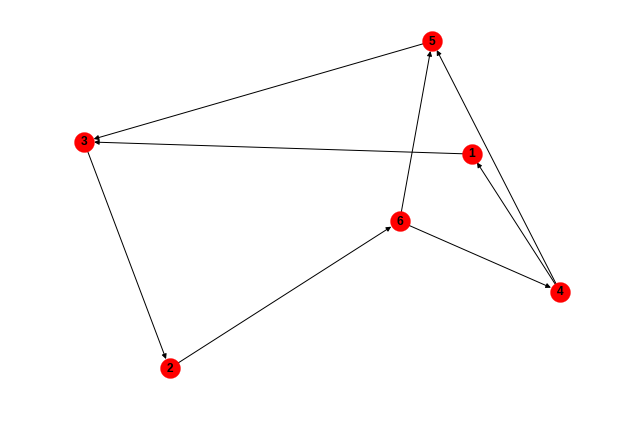

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,3),(3,2),(2,6),(6,5),(6,4),(4,5),(5,3),(4,1)])

print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))

nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print(G.edges())
A = nx.adjacency_matrix(G).T #following the notation of the textbook
print(A.todense())
print(A.todense().T)

a = np.matrix(A.todense())
c = np.dot(a,a.T) #cocitation matrix
b = np.dot(a.T,a) #bibliographic coupling

print(c-np.diag(np.diag(c))) # diagonal elements are zero 
print(b-np.diag(np.diag(b)))

degree, density

n = 6
m = 7
[(1, 2), (1, 5), (2, 3), (2, 4), (3, 5), (3, 4), (3, 6)]
<class 'scipy.sparse.csr.csr_matrix'>
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]
degree:
[[2], [3], [4], [2], [2], [1]]
[(1, 2), (2, 3), (3, 4), (4, 2), (5, 2), (6, 1)]
Degree sequence [4, 3, 2, 2, 2, 1]


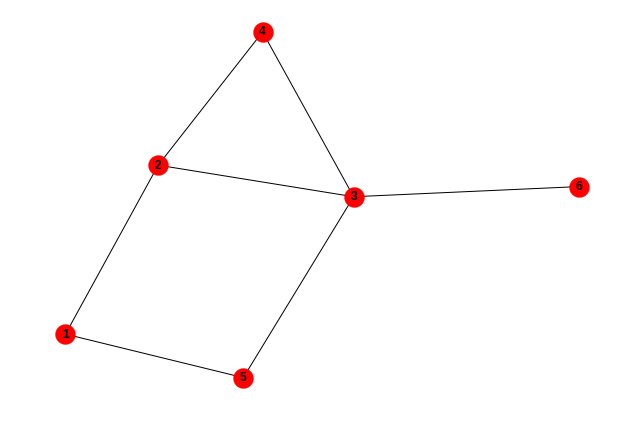

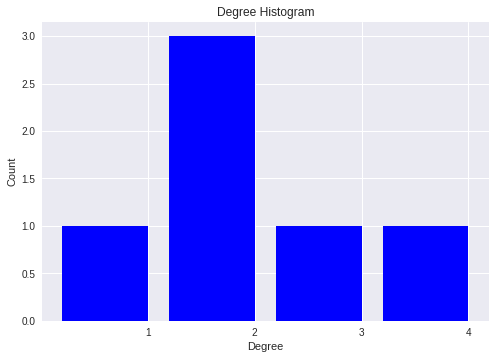

density = 0.4666666666666667
0.4666666666666667


In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

G = nx.Graph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2),(2,3),(1,5),(3,5),(2,4),(3,4),(3,6)])

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
print("n =", n)
print("m =", m)

nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print(G.edges())
A = nx.adjacency_matrix(G)
print(type(A))
print(A.todense())

#sum of each row
print("degree:")
d = np.sum(A,axis=1).tolist()
print(d)
#built-in function of networkx
print(nx.degree(G))

#degree sequence
degree_sequence = sorted([d for n, d in nx.degree(G)], reverse=True)
print("Degree sequence", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

#density
print("density =",(2*m)/(n*(n-1)))
#built-in function of networkx
print(nx.density(G))

path, cycle

n = 6
m = 7
node list: [1, 2, 3, 4, 5, 6]
edge list: [(1, 2), (1, 5), (2, 3), (2, 4), (3, 5), (3, 4), (3, 6)]
shortest path from 1 to 6 : [1, 2, 3, 6]
all shortest paths
[1, 2, 3, 6]
[1, 5, 3, 6]
average shortest path length = 1.6
adjacency matrix
A
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]
A^2
[[2 0 2 1 0 0]
 [0 3 1 1 2 1]
 [2 1 4 1 0 0]
 [1 1 1 2 1 1]
 [0 2 0 1 2 1]
 [0 1 0 1 1 1]]
A^3
[[0 5 1 2 4 2]
 [5 2 7 4 1 1]
 [1 7 2 5 6 4]
 [2 4 5 2 2 1]
 [4 1 6 2 0 0]
 [2 1 4 1 0 0]]
A^4
[[ 9  3 13  6  1  1]
 [ 3 16  8  9 12  7]
 [13  8 22  9  3  2]
 [ 6  9  9  9  7  5]
 [ 1 12  3  7 10  6]
 [ 1  7  2  5  6  4]]
cycle : [(1, 2), (2, 3), (3, 5), (5, 1)]
all paths
(1, {1: 0, 2: 1, 5: 1, 3: 2, 4: 2, 6: 3})
(2, {2: 0, 1: 1, 3: 1, 4: 1, 5: 2, 6: 2})
(3, {3: 0, 2: 1, 5: 1, 4: 1, 6: 1, 1: 2})
(4, {4: 0, 2: 1, 3: 1, 1: 2, 5: 2, 6: 2})
(5, {5: 0, 1: 1, 3: 1, 2: 2, 4: 2, 6: 2})
(6, {6: 0, 3: 1, 2: 2, 5: 2, 4: 2, 1: 3})
node list [1, 2, 3, 4, 5, 6]
[[0. 1

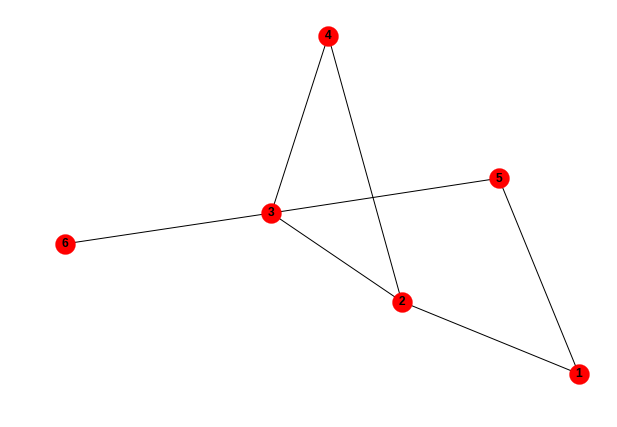

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2),(2,3),(1,5),(3,5),(2,4),(3,4),(3,6)])

print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))
print("node list:", G.nodes())
print("edge list:", G.edges())

nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print("shortest path from 1 to 6 :", nx.shortest_path(G, 1, 6))
print("all shortest paths")
for i in nx.all_shortest_paths(G, 1, 6):
  print(i)

print("average shortest path length =",nx.average_shortest_path_length(G)) # average shortest path length

#adjancy matrix 
print("adjacency matrix")
A = nx.adjacency_matrix(G)
#print(type(A))
print("A")
print(A.todense())
# paths of length 2
print("A^2")
print(A*A.todense())
# paths of length 3
print("A^3")
print(A*A*A.todense())
# paths of length 4
print("A^4")
print(A*A*A*A.todense())

#cycle
print("cycle :", nx.find_cycle(G))

#all paths
print("all paths")
for i in nx.all_pairs_shortest_path_length(G):
  print(i)
  
print("node list", G.nodes())
M = nx.to_numpy_matrix(G)
print(M)
print(M*M)


component, graph laplacian

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
G.add_nodes_from(range(1,6))
G.add_edges_from([(1,2),(2,3),(1,5),(3,5),(2,4),(3,4),(3,6),(7,8),(8,9),(7,9)])

print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))

# nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print("shortest path from 1 to 6 :", nx.shortest_path(G, 1, 6))
print("all shortest paths")
for i in nx.all_shortest_paths(G, 1, 6):
  print(i)

#connectivity
print("is connected: ", nx.is_connected(G))  
print("number of components:", nx.number_connected_components(G))
for i in nx.connected_components(G):
  print(i)


#adjancy matrix 
print("adjacency matrix")
A = nx.adjacency_matrix(G)
print("A")
print(A.todense())

L = nx.laplacian_matrix(G).todense()
print(L)
import numpy.linalg as LA 
print("eigenvalues:", LA.eig(L)[0])


n = 9
m = 10
shortest path from 1 to 6 : [1, 2, 3, 6]
all shortest paths
[1, 2, 3, 6]
[1, 5, 3, 6]
is connected:  False
number of components: 2
{1, 2, 3, 4, 5, 6}
{8, 9, 7}
adjacency matrix
A
[[0 1 0 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 0 0]
 [0 1 0 1 1 1 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0]]
[[ 2 -1  0  0 -1  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0]
 [ 0 -1  4 -1 -1 -1  0  0  0]
 [ 0 -1 -1  2  0  0  0  0  0]
 [-1  0 -1  0  2  0  0  0  0]
 [ 0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0  0 -1 -1  2]]
eigenvalues: [ 5.26881469e+00  3.86473732e+00  2.53408997e+00 -3.66596826e-16
  8.81716134e-01  1.45064188e+00  3.00000000e+00 -4.44089210e-16
  3.00000000e+00]


cut set

cut size between S and T: 2
minimum node cut between 1 and 4 {3, 5}
minimum edge cut between 1 and 4 {(5, 4), (3, 4)}


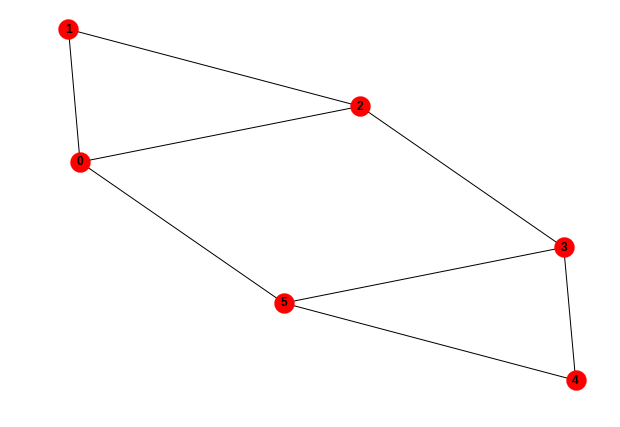

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
G = nx.barbell_graph(3, 0)
G.add_edges_from([(0,5)])
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
S = {0, 1, 2}
T = {3, 4, 5}
print("cut size between S and T:", nx.cut_size(G, S, T))
print("minimum node cut between 1 and 4", nx.minimum_node_cut(G, 1, 4))
print("minimum edge cut between 1 and 4", nx.minimum_edge_cut(G, 1, 4))
#capacity should be specified for each edge
#print("min cut between 1 and 4", nx.minimum_cut(G, 1, 4))
#print("max flow between 1 and 4", nx.maximum_flow(G, 1, 4))

quiz 2 : count the number of triangles in karate club network

n = 34
m = 78
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
[[16  7  5 ...  0  3  4]
 [ 7  9  4 ...  1  2  3]
 [ 5  4 10 ...  3  1  6]
 ...
 [ 0  1  3 ...  6  1  2]
 [ 3  2  1 ...  1 12 10]
 [ 4  3  6 ...  2 10 17]]
sum 156
trace 0
#1.
There are 45 triangles in karate club network.
#2.
The maximum number of triangle in a graph of 9 nodes is 84.
#3.
There are 0 triangles in this 9-node network.
There are 0 triangles in this 12-node network.


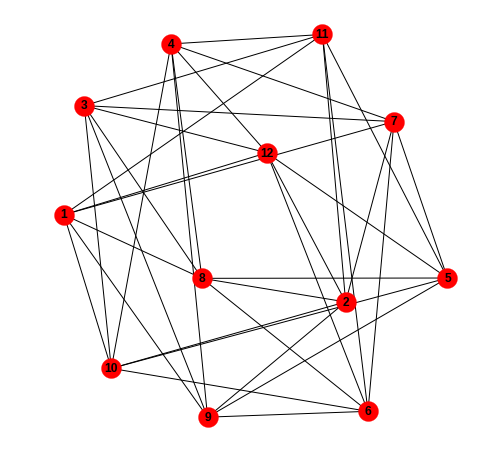

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.karate_club_graph()
plt.figure(figsize=(6, 6))
# nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))
A= nx.adjacency_matrix(G).todense()
print(A)
print(A*A)


print("sum", np.sum(A))
print("trace", np.trace(A))


#1. Make a program of counting the number of triangles in “karate club network”. Show the code and its results.
print("#1.")
print("There are %d triangles in karate club network." %(sum(nx.triangles(G).values())//3))


#2. Compute the maximum number of triangles in a graph of 9 nodes.
print("#2.")
def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)
  
def comb(n, m):
  return n * (n-1) * (n-2)//(factorial(m))

print("The maximum number of triangle in a graph of 9 nodes is %d." %(comb(9,3)))


#3. Draw a graph of 9 nodes and 12 edges that contains no triangles.
print("#3.")
G9 = nx.Graph()
G9.add_nodes_from(range(1,9))
G9.add_edges_from([(1,2),(1,3),(1,5),(1,4),(1,6),(1,7),(1,8),(1,9)])
# nx.draw_spring(G9, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("There are %d triangles in this 9-node network." %(sum(nx.triangles(G9).values())//3))

G12 = nx.Graph()
G12.add_nodes_from(range(1,12))
G12.add_edges_from([(1,7),(1,8),(1,9),(1,10),(1,11),(1,12),\
                    (2,7),(2,8),(2,9),(2,10),(2,11),(2,12),\
                    (3,7),(3,8),(3,9),(3,10),(3,11),(3,12),\
                    (4,7),(4,8),(4,9),(4,10),(4,11),(4,12),\
                    (5,7),(5,8),(5,9),(5,10),(5,11),(5,12),\
                    (6,7),(6,8),(6,9),(6,10),(6,11),(6,12)])
nx.draw_spring(G12, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("There are %d triangles in this 12-node network." %(sum(nx.triangles(G12).values())//3))